In [1]:
import numpy as np
import matplotlib.pyplot as plt

D1 = np.array([[1.0, 1.2, 3, 4, 5, 6], [1.7, 3, 2.3, 5.3, 3.8, 5.5]])
D2 = np.array([[-0.6, 1.0, 1.2, 3, 4, 5, 6], [2.9, 1.7, 3, 2.3, 5.3, 3.8, 5.5]])

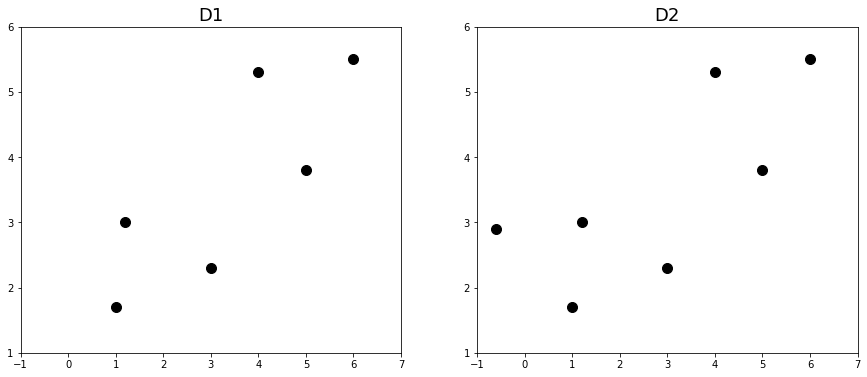

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2,sharex=True, sharey=False)
fig.set_size_inches((15,6))

ax1.plot(D1[0], D1[1], 'ko', markersize=10)
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.set_title('D1', fontsize=18)

ax2.plot(D2[0], D2[1], 'ko', markersize=10)
ax2.set_xlim([-1,7])
ax2.set_ylim([1,6])
ax2.set_title('D2', fontsize=18)

plt.show()

In [13]:
D1.shape[0]

2

In [14]:
def machine_learning(D):
    N = D.shape[1]
    X = np.c_[np.ones(N), D[0]]
    y = D[1]
    
    w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
    return w

In [15]:
np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]

array([[1, 2, 3, 0, 0, 4, 5, 6]])

In [20]:
np.ones(3)

array([1., 1., 1.])

In [21]:
D1

array([[1. , 1.2, 3. , 4. , 5. , 6. ],
       [1.7, 3. , 2.3, 5.3, 3.8, 5.5]])

In [22]:
D1.T

array([[1. , 1.7],
       [1.2, 3. ],
       [3. , 2.3],
       [4. , 5.3],
       [5. , 3.8],
       [6. , 5.5]])

In [25]:
np.dot(D1.T, D1)

array([[ 3.89,  6.3 ,  6.91, 13.01, 11.46, 15.35],
       [ 6.3 , 10.44, 10.5 , 20.7 , 17.4 , 23.7 ],
       [ 6.91, 10.5 , 14.29, 24.19, 23.74, 30.65],
       [13.01, 20.7 , 24.19, 44.09, 40.14, 53.15],
       [11.46, 17.4 , 23.74, 40.14, 39.44, 50.9 ],
       [15.35, 23.7 , 30.65, 53.15, 50.9 , 66.25]])

In [26]:
np.matmul(D1.T, D1)

array([[ 3.89,  6.3 ,  6.91, 13.01, 11.46, 15.35],
       [ 6.3 , 10.44, 10.5 , 20.7 , 17.4 , 23.7 ],
       [ 6.91, 10.5 , 14.29, 24.19, 23.74, 30.65],
       [13.01, 20.7 , 24.19, 44.09, 40.14, 53.15],
       [11.46, 17.4 , 23.74, 40.14, 39.44, 50.9 ],
       [15.35, 23.7 , 30.65, 53.15, 50.9 , 66.25]])

In [37]:
def more_clever(D):
    first, last = D[:,0], D[:,-1]
    w1 = (last[1]-first[1]) / (last[0]-first[0])
    w0 = -w1 * first[0] + first[1]
    return(w0, w1)

In [38]:
machine_learning(D1)

array([1.51079935, 0.62055465])

In [39]:
more_clever(D1)

(0.94, 0.76)

In [35]:
D1[:,0]

array([1. , 1.7])

In [36]:
D1[:,0][1]

1.7

In [40]:
def f(x,w):
    return w[1] * x + w[0]

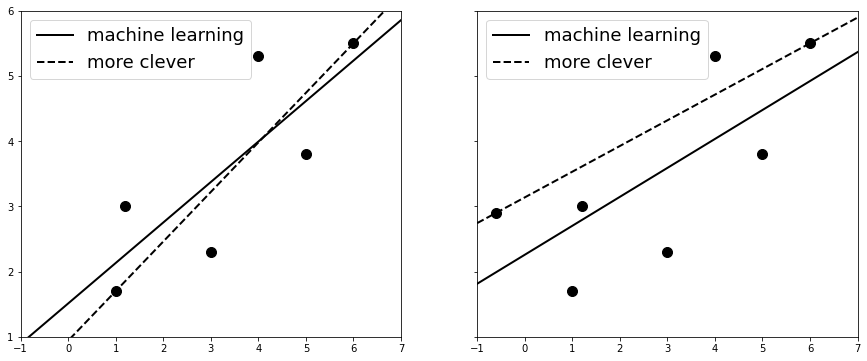

In [41]:
w_ml_d1 = machine_learning(D1)
w_mc_d1 = more_clever(D1)

w_ml_d2 = machine_learning(D2)
w_mc_d2 = more_clever(D2)

x = np.linspace(-1,7, 100)

fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True)
fig.set_size_inches((15,6))

ax1.plot(D1[0], D1[1], 'ko', markersize=10)
ax1.plot(x, f(x, w_ml_d1), c='k', lw=2, label='machine learning')
ax1.plot(x, f(x, w_mc_d1), '--', c='k', lw=2, label='more clever')
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.legend(fontsize=18)

ax2.plot(D2[0], D2[1], 'ko', markersize=10)
ax2.plot(x, f(x, w_ml_d2), c='k', lw=2, label='machine learning')
ax2.plot(x, f(x, w_mc_d2), '--', c='k', lw=2, label='more clever')
ax2.set_xlim([-1,7])
ax2.set_ylim([1,6])
ax2.legend(fontsize=18)

plt.show()

## 150번 반복해서 선을 그리며 점점 최적의 선을 찾아가는 과정

In [73]:
import numpy as np
import matplotlib.pyplot as plt

D1 = np.array([[1.0, 1.2, 3, 4, 5, 6],
             [1.5, 3, 2.3, 5.3, 3.8, 5.5]])

num_iters = 150
eta = 0.02

np.random.seed(2)
w = np.random.randn(2)
N = D1.shape[1]

ws, L = [], []

# 1열에는 숫자 1이 있고, 2열에는 데이터의 x좌표가 있는 행렬 X를 만듭니다.
# X: (N,2), Y: (N,)
X = np.c_[np.ones(N), D1[0]]
y = D1[1]

# 여기서 우리의 경험 E를 반복하면서  태스크 T를 개선합니다.
for i in range(num_iters):
    # grad L
    c = (1/N) * np.dot(X.T, np.dot(X, w) - y)
    # 안전장치 grad L을 이용해서 w를 수정합니다.
    w -= eta * c
    # w가 변화되는 과정을 저장합니다.
    ws.append(w)
    
    # 손실을 계산합니다.
    L.append( ((np.dot(X, w)-y)**2).sum()/(2*N) )

In [46]:
X

array([[1. , 1. ],
       [1. , 1.2],
       [1. , 3. ],
       [1. , 4. ],
       [1. , 5. ],
       [1. , 6. ]])

In [47]:
w

array([0.58801406, 0.83186127])

In [48]:
X.T

array([[1. , 1. , 1. , 1. , 1. , 1. ],
       [1. , 1.2, 3. , 4. , 5. , 6. ]])

In [49]:
np.dot(X, w)

array([1.41987533, 1.58624759, 3.08359787, 3.91545914, 4.74732041,
       5.57918168])

In [53]:
test = np.array([1])

In [55]:
X[1,0]*w[0]+X[1,1]*w[1]

1.5862475853230076

In [56]:
X[2,0]*w[0]+X[2,1]*w[1]

3.0835978703415035

In [57]:
X.T

array([[1. , 1. , 1. , 1. , 1. , 1. ],
       [1. , 1.2, 3. , 4. , 5. , 6. ]])

In [58]:
X.T.shape

(2, 6)

In [59]:
(np.dot(X, w) - y).shape

(6,)

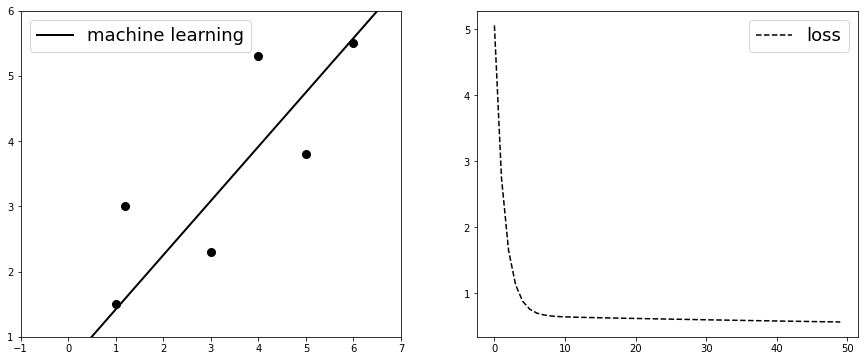

In [72]:
x = np.linspace(-1, 7, 100)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches((15,6))

ax1.plot(D1[0], D1[1], 'ko', markersize=8)
ax1.plot(x, f(x, w), c='k', lw=2, label='machine learning')
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.legend(fontsize=18)

ax2.plot(L[:50], '--', c='k', label='loss')
ax2.legend(fontsize=18)
plt.show()

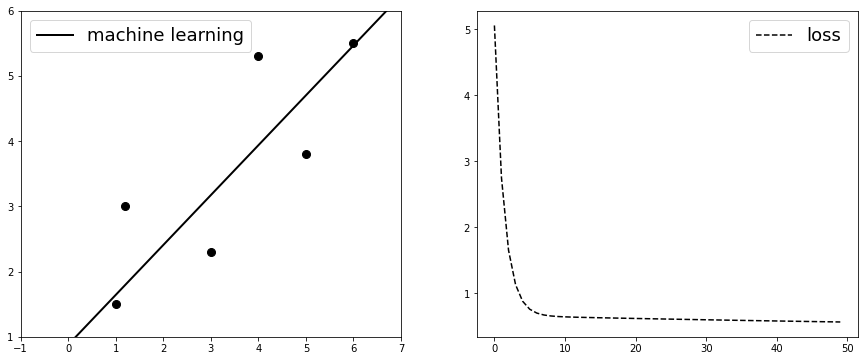

In [74]:
# num_iters = 250으로 했을 때

x = np.linspace(-1, 7, 100)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches((15,6))

ax1.plot(D1[0], D1[1], 'ko', markersize=8)
ax1.plot(x, f(x, w), c='k', lw=2, label='machine learning')
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.legend(fontsize=18)

ax2.plot(L[:50], '--', c='k', label='loss')
ax2.legend(fontsize=18)
plt.show()